<a href="https://colab.research.google.com/github/laakshit-D/mnist-classification/blob/main/Ex03DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
X_train.shape

(60000, 28, 28)

In [63]:
X_test.shape

(10000, 28, 28)

In [64]:
single_image = X_train[0]
single_image.shape

(28, 28)

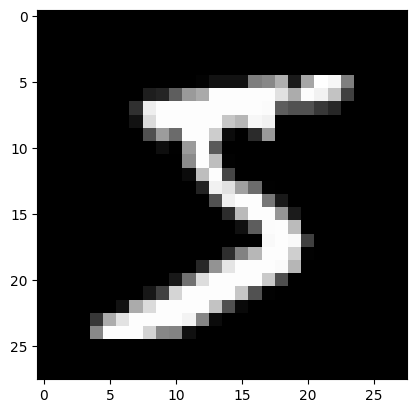

In [65]:
plt.imshow(single_image, cmap='gray')

In [66]:
y_train.shape

(60000,)

In [67]:
X_train.min()

0

In [68]:
X_train.max()

255

In [69]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [70]:
X_train_scaled.min()

0.0

In [71]:
X_train_scaled.max()

1.0

In [72]:
y_train[0]

5

In [73]:
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

In [74]:
type(y_train_onehot)

numpy.ndarray

In [75]:
y_train_onehot.shape

(60000, 10)

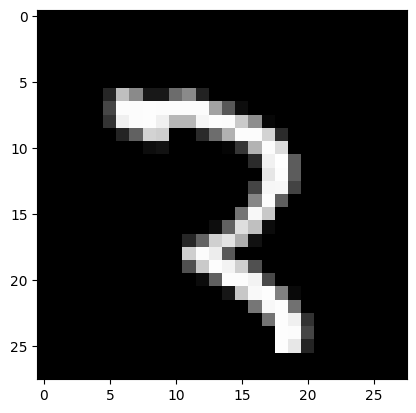

In [76]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [77]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [78]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

**Name**: **LAAKSHIT** **D**
**Register** **Number**: **212222230071**

In [79]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 16)                86544     
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 87034 (339.98 KB)
Trainable params: 87034 (339.98 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [81]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.3080 - accuracy: 0.9319 - val_loss: 0.1065 - val_accuracy: 0.9742
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0928 - accuracy: 0.9768 - val_loss: 0.0786 - val_accuracy: 0.9787
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0643 - accuracy: 0.9832 - val_loss: 0.0663 - val_accuracy: 0.9800
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0485 - accuracy: 0.9869 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.0561 - val_accuracy: 0.9825


In [82]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.0508 - val_accuracy: 0.9834
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0259 - accuracy: 0.9933 - val_loss: 0.0616 - val_accuracy: 0.9790
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.0621 - val_accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.0524 - val_accuracy: 0.9838


In [83]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.032395,0.991333,0.050830,0.9834
1,0.025928,0.993250,0.061553,0.9790
2,0.021678,0.994283,0.052282,0.9829
3,0.016685,0.996117,0.062059,0.9811
4,0.014172,0.996550,0.052374,0.9838


<Axes: >

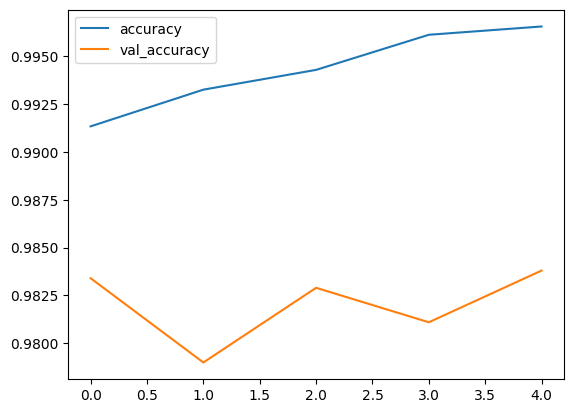

In [84]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

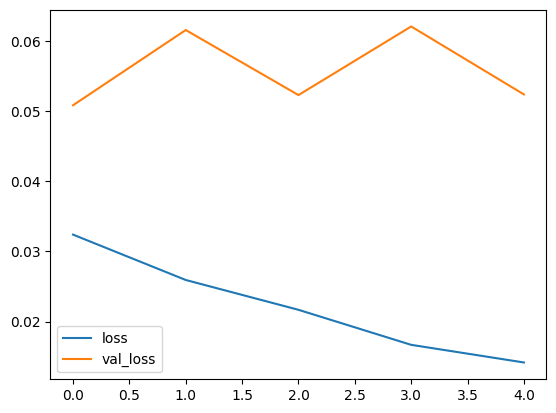

In [85]:
metrics[['loss','val_loss']].plot()

In [86]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [87]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    1    0    0    2    1    1    0    1]
 [   0 1130    2    0    0    0    0    2    1    0]
 [   2    1 1017    1    2    0    0    6    3    0]
 [   0    0    3  997    0    3    0    4    3    0]
 [   0    0    0    0  966    0    4    1    2    9]
 [   1    1    1    7    0  870    5    0    7    0]
 [   4    2    0    1    1    2  943    0    5    0]
 [   1    1    8    2    1    0    0 1014    1    0]
 [   6    0    0    4    2    2    1    5  951    3]
 [   2    0    0    7    9    5    0    6    4  976]]


In [88]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [89]:
img = image.load_img('7.jpg')

In [90]:
type(img)

PIL.Image.Image

In [91]:
img = image.load_img('7.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [92]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [93]:
print(x_single_prediction)

[7]


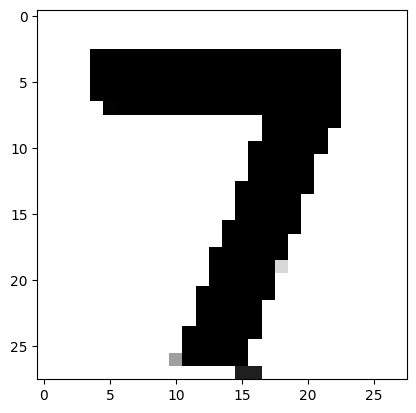

In [94]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')